**ENCS5141-Intelligent Systems Lab**

---


**Raghad Afaghani | 1192423**


---
**Section 1**


---




**Senario I : Imbalance dataset**

***The Dataset***

In [24]:
import pandas as pd

# Read the csv file
Imbalace = pd.read_csv("/content/aug_train.csv")

# Take just the first 20,000 rows
first_20000_rows = Imbalace.head(20000).copy()

# Display the first 5 rows of the first 20,000
print("### Head (First 20,000 rows) ###")
print(first_20000_rows.head())

# Display the last 5 rows of the first 20,000
print("\n### Tail (Last 5 rows of the 20,000 row) ###")
print(first_20000_rows.tail())


### Head (First 20,000 rows) ###
       id  Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0  167647    Male   22                1          7.0                   1   
1   17163    Male   42                1         28.0                   0   
2   32023  Female   66                1         33.0                   0   
3   87447  Female   22                1         33.0                   0   
4  501933    Male   28                1         46.0                   1   

  Vehicle_Age Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage  \
0    < 1 Year             No          2630.0                 152.0       16   
1    1-2 Year            Yes         43327.0                  26.0      135   
2    1-2 Year            Yes         35841.0                 124.0      253   
3    < 1 Year             No         27645.0                 152.0       69   
4    < 1 Year             No         29023.0                 152.0      211   

   Response  
0         0  
1      

***Number or rows and columns***

In [25]:
print("The number of rows in the first 20,000 rows is {} , \nThe number of columns in the first 20,000 rows is {}".format(first_20000_rows.shape[0], first_20000_rows.shape[1]))


The number of rows in the first 20,000 rows is 20000 , 
The number of columns in the first 20,000 rows is 12


***Missing Data***

In [26]:
first_20000_rows.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

***Imbalace Class***

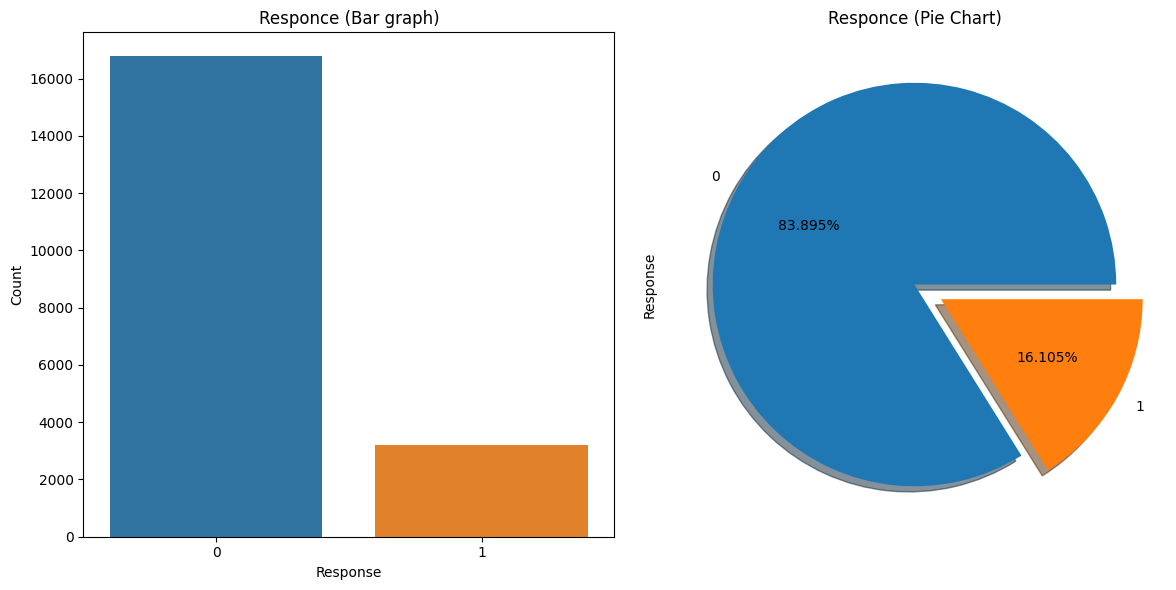

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# First subplot: Count plot
sns.countplot(data=first_20000_rows, x='Response', ax=ax1)
ax1.set_title('Responce (Bar graph)')
ax1.set_xlabel('Response')
ax1.set_ylabel('Count')

# Second subplot: Pie chart with counts
class_counts = first_20000_rows['Response'].value_counts()
class_counts.plot.pie(explode=[0, 0.15], autopct='%1.3f%%', shadow=True, ax=ax2)
ax2.set_title('Responce (Pie Chart)')

# Display both subplots
plt.tight_layout()
plt.show()


***Encoding***

In [28]:
cateogrical_cols = [cols for cols in first_20000_rows.columns if first_20000_rows[cols].dtypes =='object']
print('Categories', cateogrical_cols)

numeric_cols = [cols for cols in first_20000_rows.columns if cols not in cateogrical_cols]
print('Numerics', numeric_cols)


for cols in cateogrical_cols:
    le=LabelEncoder()
    le.fit(list(first_20000_rows[cols].astype('str')))
    first_20000_rows[cols] = le.transform(list(first_20000_rows[cols].astype(str)))


Categories ['Gender', 'Vehicle_Age', 'Vehicle_Damage']
Numerics ['id', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage', 'Response']


***Dropping the id and setting Responce as target***

In [29]:
first_20000_rows.drop(['id'], axis=1, inplace=True)
target = first_20000_rows.pop('Response')

***Data after encoding***

In [30]:
first_20000_rows

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,1,22,1,7.0,1,1,0,2630.0,152.0,16
1,1,42,1,28.0,0,0,1,43327.0,26.0,135
2,0,66,1,33.0,0,0,1,35841.0,124.0,253
3,0,22,1,33.0,0,1,0,27645.0,152.0,69
4,1,28,1,46.0,1,1,0,29023.0,152.0,211
...,...,...,...,...,...,...,...,...,...,...
19995,0,60,1,28.0,0,0,1,31007.0,156.0,197
19996,1,52,1,28.0,0,0,1,29702.0,163.0,133
19997,1,44,1,28.0,0,0,1,36441.0,26.0,267
19998,0,20,1,26.0,0,1,1,34581.0,160.0,236


***Split the data***

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(first_20000_rows, target, test_size=0.33, random_state=42)


***Train the data***

The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler
Random Forest Accuracy: 0.848030303030303
XGBoost Accuracy: 0.8442424242424242
Random Forest Memory Usage (MB): 27.6328125
XGBoost Memory Usage (MB): 44.09375
Random Forest Precision: 0.5792349726775956
Random Forest Recall: 0.1998114985862394
Random Forest F1 Score: 0.29712683952347585
XGBoost Precision: 0.52994555353902
XGBoost Recall: 0.27521206409048066
XGBoost F1 Score: 0.36228287841191065


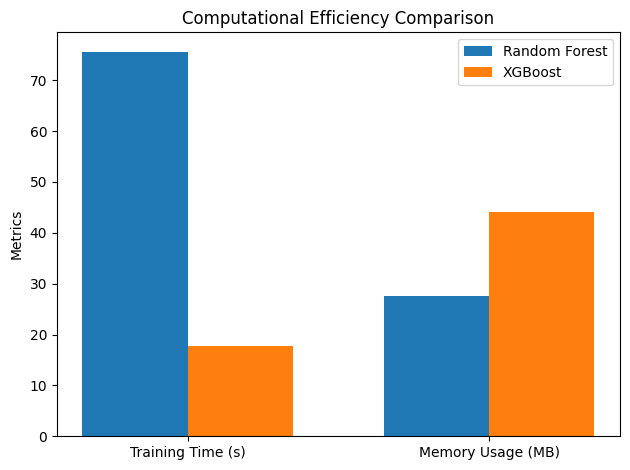

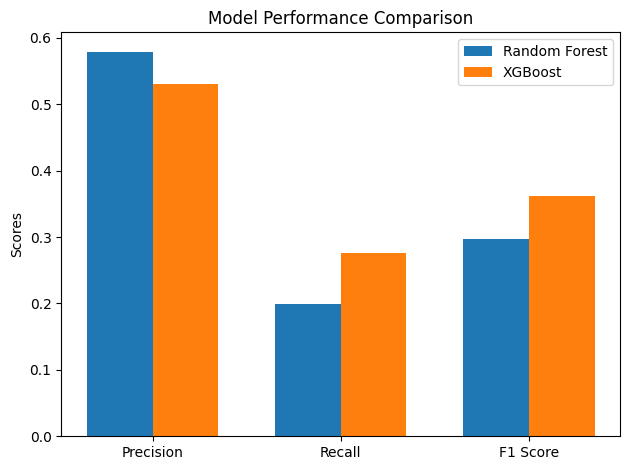

In [78]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import time
import matplotlib.pyplot as plt

%load_ext memory_profiler

#GridSearchCV Fit & Metrics.
def fit_and_measure(grid_search, X_train, y_train, X_test, y_test):
    # Measure memory usage before training
    before_memory = !cat /proc/meminfo | grep 'MemAvailable'  # How many available memory before training
    before_memory = int(before_memory[0].split()[1]) / 1024  #in MB
    start_time = time.time()

    # Trainining
    grid_search.fit(X_train, y_train)
    train_time = time.time() - start_time

    after_memory = !cat /proc/meminfo | grep 'MemAvailable'  # How many available memory after training
    after_memory = int(after_memory[0].split()[1]) / 1024  # in MB
    memory_usage = before_memory - after_memory

    # Which best estimator
    best_estimator = grid_search.best_estimator_
    predictions = best_estimator.predict(X_test)
    #Accuracy and Performance on the test set
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)

    return train_time, memory_usage, accuracy, precision, recall, f1, predictions

X_train, X_test, y_train, y_test = train_test_split(first_20000_rows, target, test_size=0.33, random_state=42)

# the two models
RandomForest = RandomForestClassifier(random_state=42)
XGBoost = XGBClassifier(random_state=42)

# Hyperparameters for gs
RandomForest_hyperparameters = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
}

XGBoost_hyperparameters = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.001],
}

#  Grid search Initialization
RandomForest_GridSearch = GridSearchCV(RandomForest, RandomForest_hyperparameters, cv=5)
XGBoost_GridSearch = GridSearchCV(XGBoost, XGBoost_hyperparameters, cv=5)

#Random Forest: Measure [training time, memory usage, and performance metrics]
RandomForest_trainTime, RandomForest_memory_usage, RandomForest_accuracy, RandomForest_precision, RandomForest_recall, RandomForest_f1, RandomForest_pred = fit_and_measure(RandomForest_GridSearch, X_train, y_train, X_test, y_test)

# XGBoost : Measure [training time, memory usage, and performance metrics]
XGBoost_trainTime, XGBoost_memory_usage, XGBoost_accuracy, XGBoost_precision, XGBoost_recall, XGBoost_f1, XGBoost_pred = fit_and_measure(XGBoost_GridSearch, X_train, y_train, X_test, y_test)


print("Random Forest Accuracy:", RandomForest_accuracy)
print("XGBoost Accuracy:", XGBoost_accuracy)

print("Random Forest Memory Usage (MB):", RandomForest_memory_usage)
print("XGBoost Memory Usage (MB):", XGBoost_memory_usage)

print("Random Forest Precision:", RandomForest_precision)
print("Random Forest Recall:", RandomForest_recall)
print("Random Forest F1 Score:", RandomForest_f1)

print("XGBoost Precision:", XGBoost_precision)
print("XGBoost Recall:", XGBoost_recall)
print("XGBoost F1 Score:", XGBoost_f1)

#Computational efficiency comparison graph
labels_efficiency = ['Training Time (s)', 'Memory Usage (MB)']
RandomForest_metrics = [RandomForest_trainTime, RandomForest_memory_usage]
XGBoost_metrics = [XGBoost_trainTime, XGBoost_memory_usage]

x = np.arange(len(labels_efficiency))
width = 0.35  #  width of bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, RandomForest_metrics, width, label='Random Forest')
rects2 = ax.bar(x + width/2, XGBoost_metrics, width, label='XGBoost')

ax.set_ylabel('Metrics')
ax.set_title('Computational Efficiency Comparison')
ax.set_xticks(x)
ax.set_xticklabels(labels_efficiency)
ax.legend()

plt.tight_layout()
plt.show()

# Bar graph to compare precision, recall, and F1 score
labels_performance = ['Precision', 'Recall', 'F1 Score']
RandomForest_scores = [RandomForest_precision, RandomForest_recall, RandomForest_f1]
XGBoost_scores = [XGBoost_precision, XGBoost_recall, XGBoost_f1]

x = range(len(labels_performance))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x, RandomForest_scores, width, label='Random Forest')
rects2 = ax.bar([i + width for i in x], XGBoost_scores, width, label='XGBoost')

ax.set_ylabel('Scores')
ax.set_title('Model Performance Comparison')
ax.set_xticks([i + width/2 for i in x])
ax.set_xticklabels(labels_performance)
ax.legend()

plt.tight_layout()
plt.show()




---



**Senario II : Large dataset**

***The Data***

In [34]:
import pandas as pd

# Read the CSV file
Large = pd.read_csv("/content/aug_train.csv")

# Display the first 5 rows
print("### Head ###")
print(Large.head())

# Display the last 5 rows
print("\n### Tail ###")
print(Large.tail())


### Head ###
       id  Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0  167647    Male   22                1          7.0                   1   
1   17163    Male   42                1         28.0                   0   
2   32023  Female   66                1         33.0                   0   
3   87447  Female   22                1         33.0                   0   
4  501933    Male   28                1         46.0                   1   

  Vehicle_Age Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage  \
0    < 1 Year             No          2630.0                 152.0       16   
1    1-2 Year            Yes         43327.0                  26.0      135   
2    1-2 Year            Yes         35841.0                 124.0      253   
3    < 1 Year             No         27645.0                 152.0       69   
4    < 1 Year             No         29023.0                 152.0      211   

   Response  
0         0  
1         0  
2         0  

***Number or rows and columns***

In [35]:
print("The number of rows in the dataset is {} , \nThe number of columns in the dataset is {}".format(Large.shape[0], Large.shape[1]))


The number of rows in the dataset is 382154 , 
The number of columns in the dataset is 12


***Missing Data***

In [36]:
Large.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

***Imbalace Class***

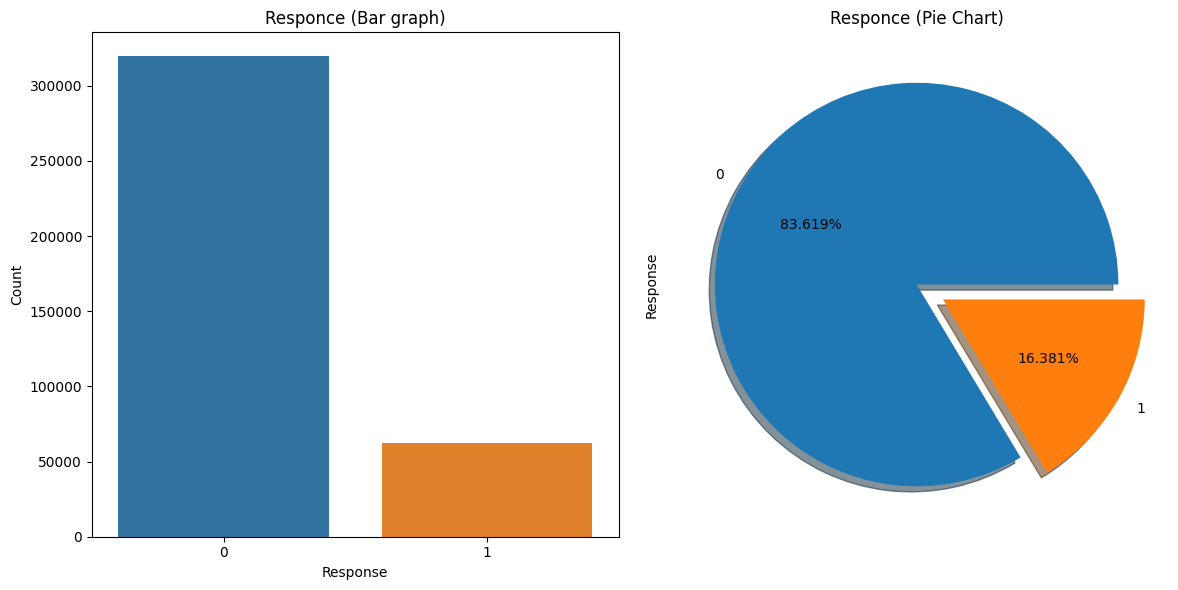

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# First subplot: Count plot
sns.countplot(data=Large, x='Response', ax=ax1)
ax1.set_title('Responce (Bar graph)')
ax1.set_xlabel('Response')
ax1.set_ylabel('Count')

# Second subplot: Pie chart with counts
class_counts = Large['Response'].value_counts()
class_counts.plot.pie(explode=[0, 0.15], autopct='%1.3f%%', shadow=True, ax=ax2)
ax2.set_title('Responce (Pie Chart)')

# Display both subplots
plt.tight_layout()
plt.show()


***Encoding***

In [38]:
cateogrical_cols = [cols for cols in Large.columns if Large[cols].dtypes =='object']
print('Categories', cateogrical_cols)

numeric_cols = [cols for cols in Large.columns if cols not in cateogrical_cols]
print('Numerics', numeric_cols)



for cols in cateogrical_cols:
    le=LabelEncoder()
    le.fit(list(Large[cols].astype('str')))
    Large[cols] = le.transform(list(Large[cols].astype(str)))


Categories ['Gender', 'Vehicle_Age', 'Vehicle_Damage']
Numerics ['id', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage', 'Response']


***data after encoding***

In [40]:
Large

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,1,22,1,7.0,1,1,0,2630.0,152.0,16
1,1,42,1,28.0,0,0,1,43327.0,26.0,135
2,0,66,1,33.0,0,0,1,35841.0,124.0,253
3,0,22,1,33.0,0,1,0,27645.0,152.0,69
4,1,28,1,46.0,1,1,0,29023.0,152.0,211
...,...,...,...,...,...,...,...,...,...,...
382149,1,24,1,15.0,0,1,1,23938.0,152.0,105
382150,1,27,1,28.0,1,1,0,336395.0,152.0,144
382151,1,45,1,28.0,0,0,1,40443.0,26.0,187
382152,0,28,1,28.0,1,1,0,25380.0,152.0,208


***Dropping the id and setting Responce as target***

In [39]:
Large.drop(['id'], axis=1, inplace=True)
target = Large.pop('Response')


***make it balance***

In [41]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(Large, target)


In [43]:
Large

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,1,22,1,7.0,1,1,0,2630.0,152.0,16
1,1,42,1,28.0,0,0,1,43327.0,26.0,135
2,0,66,1,33.0,0,0,1,35841.0,124.0,253
3,0,22,1,33.0,0,1,0,27645.0,152.0,69
4,1,28,1,46.0,1,1,0,29023.0,152.0,211
...,...,...,...,...,...,...,...,...,...,...
382149,1,24,1,15.0,0,1,1,23938.0,152.0,105
382150,1,27,1,28.0,1,1,0,336395.0,152.0,144
382151,1,45,1,28.0,0,0,1,40443.0,26.0,187
382152,0,28,1,28.0,1,1,0,25380.0,152.0,208


***Data after imbalance issue solving***

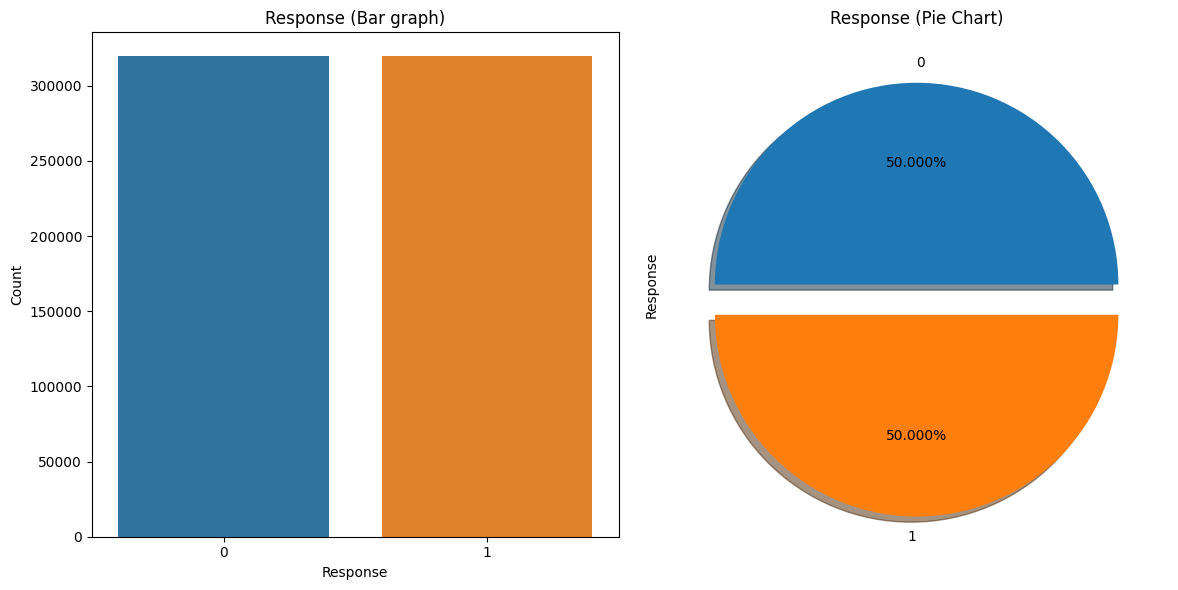

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


# Create a DataFrame with the balanced data
balanced_data = pd.DataFrame(X_resampled, columns=Large.columns)
balanced_data['Response'] = y_resampled

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# First subplot: Count plot
sns.countplot(data=balanced_data, x='Response', ax=ax1)
ax1.set_title('Response (Bar graph)')
ax1.set_xlabel('Response')
ax1.set_ylabel('Count')

# Second subplot: Pie chart with counts
class_counts = balanced_data['Response'].value_counts()
class_counts.plot.pie(explode=[0, 0.15], autopct='%1.3f%%', shadow=True, ax=ax2)
ax2.set_title('Response (Pie Chart)')

# Display both subplots
plt.tight_layout()
plt.show()


In [49]:
from sklearn.model_selection import train_test_split

# Target
target = balanced_data['Response']

# Drop the Target
X = balanced_data.drop('Response', axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.33, random_state=42)


In [50]:
!pip install memory-profiler


***Train the model***

The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler
Random Forest Accuracy: 0.9208790687750409
XGBoost Accuracy: 0.8440198193499443
Random Forest Memory Usage (MB): 844.3671875
XGBoost Memory Usage (MB): 477.140625
Random Forest Precision: 0.8693380514507381
Random Forest Recall: 0.9909387013085387
Random Forest F1 Score: 0.9261640435219313
XGBoost Precision: 0.7943650568756832
XGBoost Recall: 0.9290056242543602
XGBoost F1 Score: 0.856425856177088


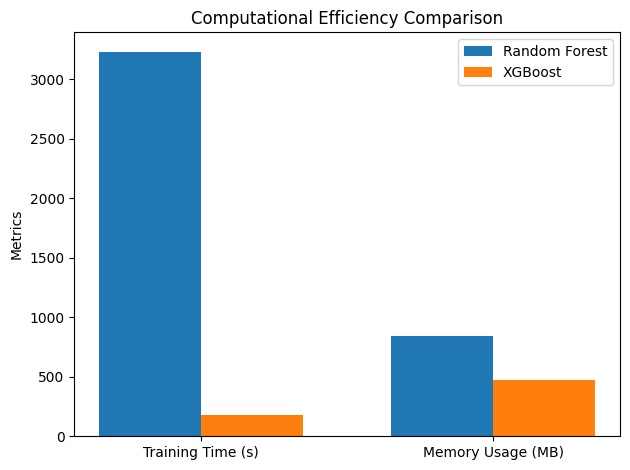

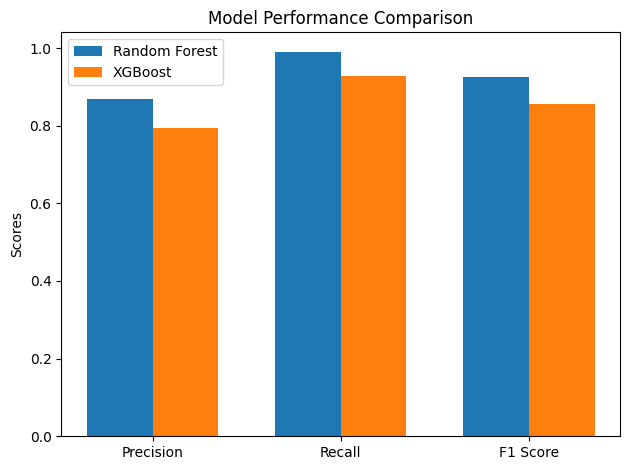

In [52]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import time
import matplotlib.pyplot as plt

%load_ext memory_profiler

#GridSearchCV Fit & Metrics.
def fit_and_measure(grid_search, X_train, y_train, X_test, y_test):
    # Measure memory usage before training
    before_memory = !cat /proc/meminfo | grep 'MemAvailable'  # How many available memory before training
    before_memory = int(before_memory[0].split()[1]) / 1024  #in MB
    start_time = time.time()

    # Trainining
    grid_search.fit(X_train, y_train)
    train_time = time.time() - start_time

    after_memory = !cat /proc/meminfo | grep 'MemAvailable'  # How many available memory after training
    after_memory = int(after_memory[0].split()[1]) / 1024  # in MB
    memory_usage = before_memory - after_memory

    # Which best estimator
    best_estimator = grid_search.best_estimator_
    predictions = best_estimator.predict(X_test)
    #Accuracy and Performance on the test set
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)

    return train_time, memory_usage, accuracy, precision, recall, f1, predictions

X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.33, random_state=42)

# the two models
RandomForest = RandomForestClassifier(random_state=42)
XGBoost = XGBClassifier(random_state=42)

# Hyperparameters for gs
RandomForest_hyperparameters = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
}

XGBoost_hyperparameters = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.001],
}

#  Grid search Initialization
RandomForest_GridSearch = GridSearchCV(RandomForest, RandomForest_hyperparameters, cv=5)
XGBoost_GridSearch = GridSearchCV(XGBoost, XGBoost_hyperparameters, cv=5)

#Random Forest: Measure [training time, memory usage, and performance metrics]
RandomForest_trainTime, RandomForest_memory_usage, RandomForest_accuracy, RandomForest_precision, RandomForest_recall, RandomForest_f1, RandomForest_pred = fit_and_measure(RandomForest_GridSearch, X_train, y_train, X_test, y_test)

# XGBoost : Measure [training time, memory usage, and performance metrics]
XGBoost_trainTime, XGBoost_memory_usage, XGBoost_accuracy, XGBoost_precision, XGBoost_recall, XGBoost_f1, XGBoost_pred = fit_and_measure(XGBoost_GridSearch, X_train, y_train, X_test, y_test)


print("Random Forest Accuracy:", RandomForest_accuracy)
print("XGBoost Accuracy:", XGBoost_accuracy)

print("Random Forest Memory Usage (MB):", RandomForest_memory_usage)
print("XGBoost Memory Usage (MB):", XGBoost_memory_usage)

print("Random Forest Precision:", RandomForest_precision)
print("Random Forest Recall:", RandomForest_recall)
print("Random Forest F1 Score:", RandomForest_f1)

print("XGBoost Precision:", XGBoost_precision)
print("XGBoost Recall:", XGBoost_recall)
print("XGBoost F1 Score:", XGBoost_f1)

#Computational efficiency comparison graph
labels_efficiency = ['Training Time (s)', 'Memory Usage (MB)']
RandomForest_metrics = [RandomForest_trainTime, RandomForest_memory_usage]
XGBoost_metrics = [XGBoost_trainTime, XGBoost_memory_usage]

x = np.arange(len(labels_efficiency))
width = 0.35  #  width of bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, RandomForest_metrics, width, label='Random Forest')
rects2 = ax.bar(x + width/2, XGBoost_metrics, width, label='XGBoost')

ax.set_ylabel('Metrics')
ax.set_title('Computational Efficiency Comparison')
ax.set_xticks(x)
ax.set_xticklabels(labels_efficiency)
ax.legend()

plt.tight_layout()
plt.show()

# Bar graph to compare precision, recall, and F1 score
labels_performance = ['Precision', 'Recall', 'F1 Score']
RandomForest_scores = [RandomForest_precision, RandomForest_recall, RandomForest_f1]
XGBoost_scores = [XGBoost_precision, XGBoost_recall, XGBoost_f1]

x = range(len(labels_performance))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x, RandomForest_scores, width, label='Random Forest')
rects2 = ax.bar([i + width for i in x], XGBoost_scores, width, label='XGBoost')

ax.set_ylabel('Scores')
ax.set_title('Model Performance Comparison')
ax.set_xticks([i + width/2 for i in x])
ax.set_xticklabels(labels_performance)
ax.legend()

plt.tight_layout()
plt.show()


In [41]:
!pip install psutil




---



**Senario III: Varying degrees of dimensionality**

***The Dataset***

In [2]:
import pandas as pd

# Read the CSV file
multiDimension = pd.read_csv("/content/adult.csv")

# Display the first 5 rows
print("### Head ###")
print(multiDimension.head())

# Display the last 5 rows
print("\n### Tail ###")
print(multiDimension.tail())


### Head ###
   age workclass  fnlwgt     education  education.num marital.status  \
0   90         ?   77053       HS-grad              9        Widowed   
1   82   Private  132870       HS-grad              9        Widowed   
2   66         ?  186061  Some-college             10        Widowed   
3   54   Private  140359       7th-8th              4       Divorced   
4   41   Private  264663  Some-college             10      Separated   

          occupation   relationship   race     sex  capital.gain  \
0                  ?  Not-in-family  White  Female             0   
1    Exec-managerial  Not-in-family  White  Female             0   
2                  ?      Unmarried  Black  Female             0   
3  Machine-op-inspct      Unmarried  White  Female             0   
4     Prof-specialty      Own-child  White  Female             0   

   capital.loss  hours.per.week native.country income  
0          4356              40  United-States  <=50K  
1          4356              18  

***Number or rows and columns***

In [3]:
multiDimension.shape


(32561, 15)

***Missing Data***

In [4]:
multiDimension.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

***There is no missing values but there is fields contains ?***

In [5]:
import numpy as np

multiDimension[multiDimension == '?'] = np.nan


***Missing Data***

In [6]:
multiDimension.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

Now,there is missing valuse in workclass,occupation and native.country.

***Imputation***

In [7]:
for col in ['workclass', 'occupation', 'native.country']:
    multiDimension[col].fillna(multiDimension[col].mode()[0], inplace=True)


***Checking for nulls***

In [8]:
multiDimension.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

**Target**

In [9]:
X = multiDimension.drop(['income'], axis=1)
target = multiDimension['income']

In [10]:
from sklearn.preprocessing import LabelEncoder

# Target
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(target)

# The original and encoded target values for comparison
print("Original Target Values:\n", target.head())
print("Encoded Target Values:\n", y_encoded[:5])  # Displaying the first 5 encoded values


Original Target Values:
 0    <=50K
1    <=50K
2    <=50K
3    <=50K
4    <=50K
Name: income, dtype: object
Encoded Target Values:
 [0 0 0 0 0]


In [11]:
print("Original Target Values:\n", target.head(10))
print("Encoded Target Values:\n", y_encoded[:10])


Original Target Values:
 0    <=50K
1    <=50K
2    <=50K
3    <=50K
4    <=50K
5    <=50K
6    <=50K
7     >50K
8    <=50K
9     >50K
Name: income, dtype: object
Encoded Target Values:
 [0 0 0 0 0 0 0 1 0 1]


The label <=50K is encoded as 0.
The label >50K is encoded as 1.


***Split the data***

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y_encoded, test_size = 0.2, random_state = 0)


**Encoding**

In [16]:
from sklearn.preprocessing import LabelEncoder

categorical_features = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']

label_encoder = LabelEncoder()

for feature in categorical_features:
    X_train[feature] = label_encoder.fit_transform(X_train[feature])
    X_test[feature] = label_encoder.transform(X_test[feature])

y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)


In [17]:
from sklearn.preprocessing import StandardScaler

# Scaler instance
scaler = StandardScaler()

# Fit and transform the training data
X_train = scaler.fit_transform(X_train)

# Transform the testing data
X_test = scaler.transform(X_test)

# Convert the scaled arrays back to DataFrames with the same column names
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)


In [18]:
X_train.head()


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,0.177807,-0.086682,0.173244,1.218035,-0.036491,-0.407250,1.229093,-0.898177,0.394225,0.698654,-0.144749,-0.21852,0.851632,0.262277
1,-0.993245,-1.885092,0.018238,-0.336949,1.130745,0.924081,-1.037414,0.971835,0.394225,0.698654,-0.144749,-0.21852,-1.254868,0.262277
2,-0.993245,-0.086682,-0.092370,0.181379,-0.425570,0.924081,-1.541082,1.595172,-1.947837,-1.431324,-0.144749,-0.21852,-0.039580,0.262277
3,1.056095,-0.086682,-0.631948,0.181379,-0.425570,2.255412,-0.030077,-0.274840,0.394225,-1.431324,-0.144749,-0.21852,-0.039580,0.262277
4,-1.066435,-0.086682,-0.639694,-0.336949,1.130745,0.924081,-0.533746,0.971835,0.394225,-1.431324,-0.144749,-0.21852,-0.039580,0.262277


***Train the model***

In [25]:

# Identify categorical columns
categorical_cols = multiDimension.select_dtypes(include=['object']).columns

# Apply label encoding to each categorical column
label_encoder = LabelEncoder()
for col in categorical_cols:
    multiDimension[col] = label_encoder.fit_transform(multiDimension[col])

# Split the dataset
X = multiDimension.drop(['income'], axis=1)  # Assuming income is our target column
y = multiDimension['income']

# Encode the target variable
y_encoded = label_encoder.fit_transform(y)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=0)



In [22]:
!pip install memory_profiler


The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler
Random Forest Accuracy: 0.8662674650698603
XGBoost Accuracy: 0.871641332719177
Random Forest Memory Usage (MB): 182.50390625
XGBoost Memory Usage (MB): 18.49609375
Random Forest Precision: 0.777504105090312
Random Forest Recall: 0.612152553329024
Random Forest F1 Score: 0.68499095840868
XGBoost Precision: 0.7757951900698216
XGBoost Recall: 0.6464124111182935
XGBoost F1 Score: 0.7052186177715092


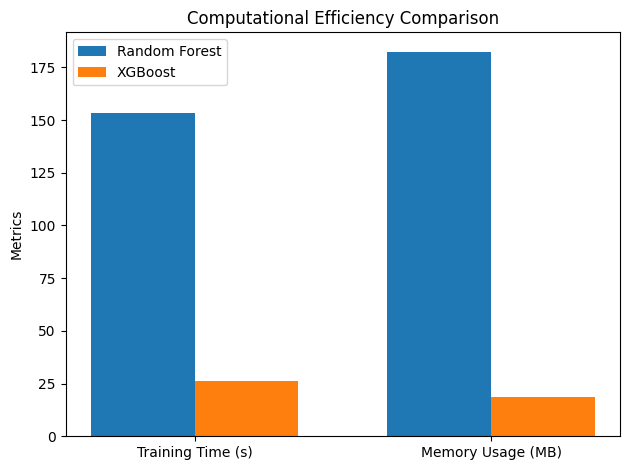

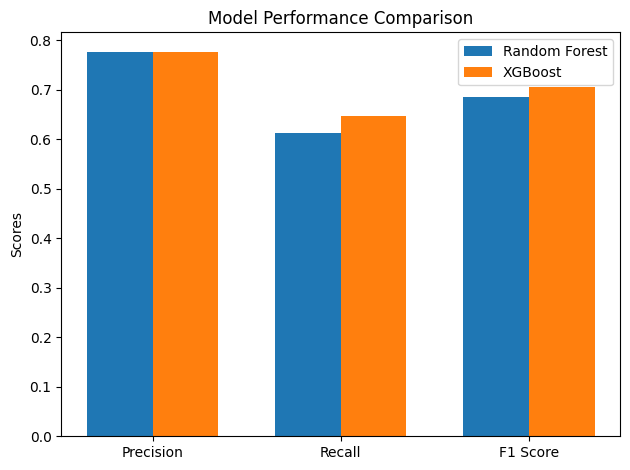

In [32]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import time
import matplotlib.pyplot as plt
from memory_profiler import memory_usage

%load_ext memory_profiler

#GridSearchCV Fit & Metrics.
def fit_and_measure(grid_search, X_train, y_train, X_test, y_test):
    # Measure memory usage before training
    before_memory = !cat /proc/meminfo | grep 'MemAvailable'  # How many available memory before training
    before_memory = int(before_memory[0].split()[1]) / 1024  #in MB
    start_time = time.time()

    # Trainining
    grid_search.fit(X_train, y_train)
    train_time = time.time() - start_time

    after_memory = !cat /proc/meminfo | grep 'MemAvailable'  # How many available memory after training
    after_memory = int(after_memory[0].split()[1]) / 1024  # in MB
    memory_usage = before_memory - after_memory

    # Which best estimator
    best_estimator = grid_search.best_estimator_
    predictions = best_estimator.predict(X_test)
    #Accuracy and Performance on the test set
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)

    return train_time, memory_usage, accuracy, precision, recall, f1, predictions

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=0)

# the two models
RandomForest = RandomForestClassifier(random_state=42)
XGBoost = XGBClassifier(random_state=42)

# Hyperparameters for gs
RandomForest_hyperparameters = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
}

XGBoost_hyperparameters = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.001],
}

#  Grid search Initialization
RandomForest_GridSearch = GridSearchCV(RandomForest, RandomForest_hyperparameters, cv=5)
XGBoost_GridSearch = GridSearchCV(XGBoost, XGBoost_hyperparameters, cv=5)

#Random Forest: Measure [training time, memory usage, and performance metrics]
RandomForest_trainTime, RandomForest_memory_usage, RandomForest_accuracy, RandomForest_precision, RandomForest_recall, RandomForest_f1, RandomForest_pred = fit_and_measure(RandomForest_GridSearch, X_train, y_train, X_test, y_test)

# XGBoost : Measure [training time, memory usage, and performance metrics]
XGBoost_trainTime, XGBoost_memory_usage, XGBoost_accuracy, XGBoost_precision, XGBoost_recall, XGBoost_f1, XGBoost_pred = fit_and_measure(XGBoost_GridSearch, X_train, y_train, X_test, y_test)


print("Random Forest Accuracy:", RandomForest_accuracy)
print("XGBoost Accuracy:", XGBoost_accuracy)

print("Random Forest Memory Usage (MB):", RandomForest_memory_usage)
print("XGBoost Memory Usage (MB):", XGBoost_memory_usage)

print("Random Forest Precision:", RandomForest_precision)
print("Random Forest Recall:", RandomForest_recall)
print("Random Forest F1 Score:", RandomForest_f1)

print("XGBoost Precision:", XGBoost_precision)
print("XGBoost Recall:", XGBoost_recall)
print("XGBoost F1 Score:", XGBoost_f1)

#Computational efficiency comparison graph
labels_efficiency = ['Training Time (s)', 'Memory Usage (MB)']
RandomForest_metrics = [RandomForest_trainTime, RandomForest_memory_usage]
XGBoost_metrics = [XGBoost_trainTime, XGBoost_memory_usage]

x = np.arange(len(labels_efficiency))
width = 0.35  #  width of bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, RandomForest_metrics, width, label='Random Forest')
rects2 = ax.bar(x + width/2, XGBoost_metrics, width, label='XGBoost')

ax.set_ylabel('Metrics')
ax.set_title('Computational Efficiency Comparison')
ax.set_xticks(x)
ax.set_xticklabels(labels_efficiency)
ax.legend()

plt.tight_layout()
plt.show()

# Bar graph to compare precision, recall, and F1 score
labels_performance = ['Precision', 'Recall', 'F1 Score']
RandomForest_scores = [RandomForest_precision, RandomForest_recall, RandomForest_f1]
XGBoost_scores = [XGBoost_precision, XGBoost_recall, XGBoost_f1]

x = range(len(labels_performance))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x, RandomForest_scores, width, label='Random Forest')
rects2 = ax.bar([i + width for i in x], XGBoost_scores, width, label='XGBoost')

ax.set_ylabel('Scores')
ax.set_title('Model Performance Comparison')
ax.set_xticks([i + width/2 for i in x])
ax.set_xticklabels(labels_performance)
ax.legend()

plt.tight_layout()
plt.show()
